#Campus-Pooling
###DSA MTE Project


In [ ]:
# Installing dependencies
!pip install osmnx
!python -m pip uninstall matplotlib -y
!pip install matplotlib==3.1.3

     |████████████████████████████████| 95 kB 3.0 MB/s 
     |████████████████████████████████| 15.7 MB 59 kB/s 
     |████████████████████████████████| 11.3 MB 31.9 MB/s 
     |████████████████████████████████| 994 kB 67.2 MB/s 
     |████████████████████████████████| 11.2 MB 44.4 MB/s 
     |████████████████████████████████| 6.3 MB 24.2 MB/s 
     |████████████████████████████████| 62 kB 658 kB/s 
     |████████████████████████████████| 1.0 MB 58.1 MB/s 
     |████████████████████████████████| 15.4 MB 27 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uni

Found existing installation: matplotlib 3.5.0
Uninstalling matplotlib-3.5.0:
  Successfully uninstalled matplotlib-3.5.0
     |████████████████████████████████| 13.1 MB 97 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Importing Dependecies
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np

%matplotlib inline

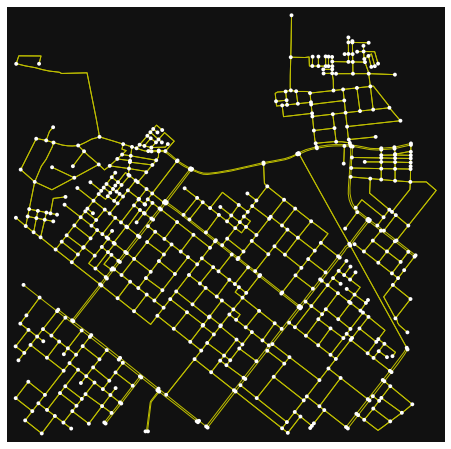

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23b13a1610>)

In [ ]:
north,east,south,west=28.7532,77.1361,28.7288,77.1104    # input the graph detail 

# Downloading the map as a graph object
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive')
# Plotting the map graph
ox.plot_graph(G, edge_color="y",save=True, filepath="\Map_test.png")

In [ ]:
# Print total nodes and edges in the graph
v=len(G.nodes)
print("Nodes-",v)

e=len(G.edges)
print("Edges-",e)

Nodes- 622
Edges- 1633


In [ ]:
edge_details=[]
node_details=[]
for e in G.edges(data=True):
  edge_details.append(e)
for n in G.nodes(data=True):
  node_details.append(n)

for i in range(5):
  print(edge_details[i])
for i in range(5):
  print(node_details[i])

(921083822, 921083969, {'osmid': 879145484, 'oneway': True, 'name': 'KN katju marg', 'highway': 'tertiary', 'length': 9.777})
(921083822, 921810837, {'osmid': [78484416, 78484498, 78484422], 'oneway': True, 'highway': 'tertiary', 'length': 282.533, 'bridge': 'yes', 'name': 'Giani Gurumukhi Musafir Marg', 'geometry': <shapely.geometry.linestring.LineString object at 0x7f23af7c6b10>})
(921083874, 921084889, {'osmid': 78484479, 'oneway': True, 'highway': 'tertiary', 'length': 16.952})
(921083874, 1826910005, {'osmid': 171699459, 'highway': 'residential', 'oneway': False, 'length': 13.501})
(921083874, 922108355, {'osmid': 78595506, 'oneway': True, 'highway': 'tertiary', 'length': 193.694, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f23af7d22d0>})
(921083822, {'y': 28.7351193, 'x': 77.1141688, 'street_count': 3})
(921083874, {'y': 28.7449047, 'x': 77.1318796, 'street_count': 5})
(921083969, {'y': 28.7350656, 'x': 77.1142482, 'street_count': 3})
(921084010, {'y': 28.740

In [ ]:
# Creating a dictionary to 0-index the nodes
di={}
index=0
for node in G.nodes(data=True):
  di[node[0]]=[index]     # each value of dictionary correspond to the index
  di[index]=[node[0]]
  index+=1

In [ ]:
print(di)

{921083822: [0], 0: [921083822], 921083874: [1], 1: [921083874], 921083969: [2], 2: [921083969], 921084010: [3], 3: [921084010], 921084039: [4], 4: [921084039], 921084072: [5], 5: [921084072], 921084084: [6], 6: [921084084], 921084094: [7], 7: [921084094], 921084139: [8], 8: [921084139], 921084174: [9], 9: [921084174], 921084282: [10], 10: [921084282], 921084317: [11], 11: [921084317], 921084341: [12], 12: [921084341], 921084384: [13], 13: [921084384], 921084413: [14], 14: [921084413], 921084479: [15], 15: [921084479], 921084483: [16], 16: [921084483], 921084605: [17], 17: [921084605], 921084620: [18], 18: [921084620], 921084709: [19], 19: [921084709], 921084713: [20], 20: [921084713], 921084718: [21], 21: [921084718], 921084774: [22], 22: [921084774], 921084838: [23], 23: [921084838], 921084889: [24], 24: [921084889], 921084892: [25], 25: [921084892], 921616170: [26], 26: [921616170], 921616197: [27], 27: [921616197], 921616201: [28], 28: [921616201], 921616346: [29], 29: [921616346],

In [ ]:
# Creating list of edges corresponding to 0-indexed nodes
li=[]

for edge in G.edges(data=True):
    src_id=edge[0]
    dst_id=edge[1]
    new_src=di[src_id][0]
    new_dst=di[dst_id][0]
    weight=edge[2]['length']
    li.append([new_src,new_dst,weight])


In [ ]:
print(li)

[[0, 2, 9.777], [0, 177, 282.533], [1, 24, 16.952], [1, 397, 13.501], [1, 245, 193.694], [2, 69, 140.316], [3, 14, 12.256], [4, 22, 12.159], [4, 273, 189.965], [5, 17, 204.03], [5, 16, 10.989], [6, 7, 12.832], [6, 367, 112.376], [7, 168, 136.035], [7, 23, 9.13], [8, 25, 10.763], [9, 21, 12.084], [9, 159, 91.885], [10, 456, 46.056], [10, 524, 20.47], [11, 12, 9.841], [11, 191, 130.503], [12, 9, 12.977], [12, 201, 47.663], [13, 6, 9.153], [14, 4, 9.419], [14, 387, 57.585], [15, 1, 9.419], [15, 267, 40.275], [16, 60, 135.037], [17, 8, 157.659], [17, 87, 10.699], [19, 281, 126.547], [19, 15, 425.475], [20, 18, 11.614], [20, 158, 283.14099999999996], [21, 11, 12.69], [21, 472, 249.927], [22, 3, 9.386], [22, 19, 79.602], [23, 190, 135.651], [23, 13, 12.826], [24, 289, 67.757], [24, 15, 10.565], [25, 8, 10.763], [25, 92, 74.565], [26, 63, 67.205], [26, 43, 61.504000000000005], [26, 70, 135.43], [27, 42, 53.546], [27, 46, 129.199], [27, 62, 129.502], [28, 48, 64.541], [28, 83, 68.33], [28, 38,

In [ ]:
# Defining adjacency list function and Dijkstra's Algorithm

from collections import defaultdict
import sys

class Node_Distance :

    def __init__(self, name, dist) :
        self.name = name
        self.dist = dist
parent=[]
parent.clear()
for i in range(v):
    parent.append(i)    
class Graph :

    def __init__(self, node_count) :
        self.adjlist = defaultdict(list)
        self.node_count = node_count

    def Add_Into_Adjlist(self, src, node_dist) :
        self.adjlist[src].append(node_dist)

    def Dijkstras_Shortest_Path(self, source,dst) :

        # Initialize the distance of all the nodes from the source node to infinity
        distance = [999999999999] * self.node_count
        # Distance of source node to itself is 0
        distance[source] = 0

        # Create a dictionary of { node, distance_from_source }
        dict_node_length = {source: 0}

        while dict_node_length :

            # Get the key for the smallest value in the dictionary
            # i.e Get the node with the shortest distance from the source
            current_source_node = min(dict_node_length, key = lambda k: dict_node_length[k])
            del dict_node_length[current_source_node]
            if(current_source_node==dst):
                break

            for node_dist in self.adjlist[current_source_node] :
                adjnode = node_dist.name
                length_to_adjnode = node_dist.dist

                # Edge relaxation
                if distance[adjnode] > distance[current_source_node] + length_to_adjnode :
                    parent[adjnode]=current_source_node
                    distance[adjnode] = distance[current_source_node] + length_to_adjnode
                    dict_node_length[adjnode] = distance[adjnode]
        return distance[dst]

In [ ]:
# Creating the Adjacency list for or graph

g = Graph(v)   # graph with v number of vertex
for i in range(e):    #graph with e number of edges
   g.Add_Into_Adjlist(li[i][0], Node_Distance(li[i][1],li[i][2]))

In [ ]:
origin_point = (

    28.7375, 77.1184

) #source
destination_point = (28.7457, 77.1172)   #destination

# get the nearest nodes to the locations
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)


input_node_id_zero_index=di[origin_node][0]
output_node_id_zero_indexed=di[destination_node][0]

# printing the closest node id to origin and destination points
# origin_node, destination_node
print("Source node node id - ",origin_node)
print("Source node vertex id - ", input_node_id_zero_index)
print("Destination node id - ",destination_node)
print("Destination node vertex id - ",output_node_id_zero_indexed)

# 

ShortestDist=g.Dijkstras_Shortest_Path(input_node_id_zero_index,output_node_id_zero_indexed)
print(ShortestDist," meters")

Source node node id -  921810451
Source node vertex id -  143
Destination node id -  3012862948
Destination node vertex id -  458
1144.0  meters


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning:

The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning:

The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.



In [ ]:
# storing all the nodes in the between source and destination in route[]

route=[]
route.clear()
curr=output_node_id_zero_indexed
while(curr!=input_node_id_zero_index):
  route.append(curr)
  curr=parent[curr]
route.append(input_node_id_zero_index)

route.reverse()
print(route)   # this is the path of nodes that contain the shortest path from source to destination

[143, 180, 160, 239, 228, 433, 585, 589, 443, 594, 438, 444, 457, 436, 518, 463, 462, 521, 466, 460, 461, 458]


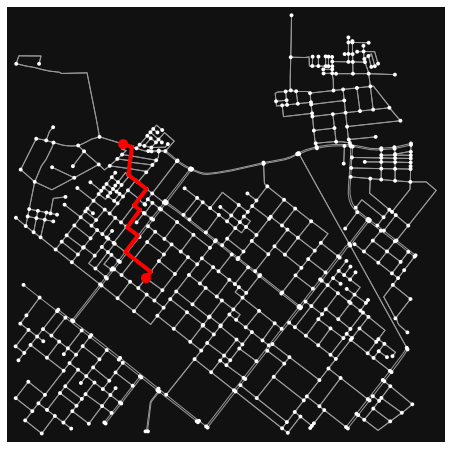

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd45b3acd10>)

In [ ]:
path=[]
path.clear()
for pa in route:
    path.append(di[pa][0])  #getting nodes address from 0-indexed nodes
ox.plot_graph_route(G, path, route_color='r', route_linewidth=4, route_alpha=1, orig_dest_size=100)   # to visualize the path


In [ ]:
# getting all the requested pooled locations
interPoints=[(28.7411, 77.1146), (28.7418, 77.119),(28.7435,77.1182)]

interNodes_non=[]
interNodes=[]

for i in interPoints:
  inter_node = ox.get_nearest_node(G, i)
  inter_node_id_zero_index=di[inter_node][0]
  interNodes_non.append(inter_node)
  interNodes.append(inter_node_id_zero_index)

print(interNodes, interNodes_non)

[434, 595, 462] [3008710370, 4231892594, 3012863146]


/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning:

The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning:

The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning:

The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.



In [ ]:
# Getting all possible combinations of intermediate stops to be made by the user
nodes=interNodes

source=input_node_id_zero_index
destination=output_node_id_zero_indexed
dS=g.Dijkstras_Shortest_Path(source,destination)

from itertools import combinations, permutations

comb=[] 
for i in range(0,len(nodes)+1):
  for j in (combinations(nodes,i)):
    comb.append(list(j))

per=[]
# print(comb)
# Print the obtained combinations
for i in comb:
  for j in permutations(i):
    per.append(list(j))

for i in per:
  print(i)

[]
[434]
[595]
[462]
[434, 595]
[595, 434]
[434, 462]
[462, 434]
[595, 462]
[462, 595]
[434, 595, 462]
[434, 462, 595]
[595, 434, 462]
[595, 462, 434]
[462, 434, 595]
[462, 595, 434]


In [ ]:
# Appending source and destination to the combinations formed
source=input_node_id_zero_index
destination=output_node_id_zero_indexed
dS=g.Dijkstras_Shortest_Path(source,destination)

newInter=[]

for i in per:
  temp=[]
  temp=[source]+i+[destination]
  newInter.append(temp)

for i in newInter:
  print(i)

[143, 458]
[143, 434, 458]
[143, 595, 458]
[143, 462, 458]
[143, 434, 595, 458]
[143, 595, 434, 458]
[143, 434, 462, 458]
[143, 462, 434, 458]
[143, 595, 462, 458]
[143, 462, 595, 458]
[143, 434, 595, 462, 458]
[143, 434, 462, 595, 458]
[143, 595, 434, 462, 458]
[143, 595, 462, 434, 458]
[143, 462, 434, 595, 458]
[143, 462, 595, 434, 458]


In [ ]:
# Calculating distance of all possible combinations less than seating capacity
Interdist=[]

for i in newInter:
  dist=0
  temp=[]
  temp.append(i[0])
  print(i[0]," ", end='')
  for j in range(len(i)-1):
    dist+=g.Dijkstras_Shortest_Path(i[j],i[j+1])
    print(i[j+1]," ",end='')
    temp.append(i[j+1])
  print("dist-",round(dist,2))
  l=[]
  l.append(round(dist,2))
  l.append(temp)
  Interdist.append(l)

143  458  dist- 1144.0
143  434  458  dist- 1293.73
143  595  458  dist- 1146.98
143  462  458  dist- 1144.0
143  434  595  458  dist- 1668.94
143  595  434  458  dist- 1980.37
143  434  462  458  dist- 1293.73
143  462  434  458  dist- 2146.6
143  595  462  458  dist- 1146.98
143  462  595  458  dist- 1688.42
143  434  595  462  458  dist- 1668.94
143  434  462  595  458  dist- 1838.15
143  595  434  462  458  dist- 1980.37
143  595  462  434  458  dist- 2149.58
143  462  434  595  458  dist- 2521.8
143  462  595  434  458  dist- 2521.8


In [ ]:
print(Interdist)

[[1144.0, [143, 458]], [1293.73, [143, 434, 458]], [1146.98, [143, 595, 458]], [1144.0, [143, 462, 458]], [1668.94, [143, 434, 595, 458]], [1980.37, [143, 595, 434, 458]], [1293.73, [143, 434, 462, 458]], [2146.6, [143, 462, 434, 458]], [1146.98, [143, 595, 462, 458]], [1688.42, [143, 462, 595, 458]], [1668.94, [143, 434, 595, 462, 458]], [1838.15, [143, 434, 462, 595, 458]], [1980.37, [143, 595, 434, 462, 458]], [2149.58, [143, 595, 462, 434, 458]], [2521.8, [143, 462, 434, 595, 458]], [2521.8, [143, 462, 595, 434, 458]]]


In [ ]:
# Finding the most optimal combination to pick based on seating capacity and distance not more than 1.5 times the original distance

optimalRoute=[]
maxdist=Interdist[0][0]*1.5
intercount=0
curdist=0
print("Max feasible dist-",(maxdist))

for i in Interdist[:]:
  if(i[0]<=float(maxdist) and intercount<=len(i[1])):
    intercount=len(i[1])
    optimalRoute=i[1]
    curdist=i[0]

print(optimalRoute, curdist)

Max feasible dist- 1716.0
[143, 434, 595, 462, 458] 1668.94


In [ ]:
# Finding route for the found optimal path
route=[]
route.clear()

curoute=[]
for i in reversed(range(1,len(optimalRoute))):
  cursource=optimalRoute[i-1]
  curdestination=optimalRoute[i]
  g.Dijkstras_Shortest_Path(cursource,curdestination)
  print(curdestination)
  curr=curdestination
  while(curr!=cursource):
    curoute.append(curr)
    curr=parent[curr]
curoute.append(optimalRoute[0])
curoute.reverse()
print(curoute)

458
462
595
434
[143, 180, 160, 239, 228, 582, 486, 481, 583, 451, 446, 427, 434, 427, 491, 428, 435, 452, 439, 443, 594, 592, 595, 159, 444, 457, 436, 518, 463, 462, 521, 466, 460, 461, 458]


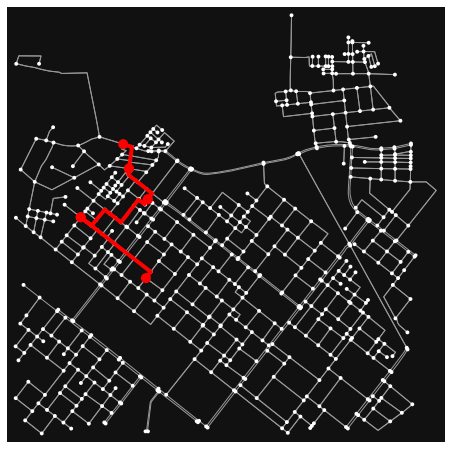

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd45b03c410>)

In [ ]:
#plotting the route

%matplotlib inline
path=[]
path.clear()
for pa in curoute:
    path.append(di[pa][0])

newPath=[]
newPath.append(path)
for i in range(1,len(optimalRoute)-1):
  # print([optimalRoute[i]])
  newPath.append([di[optimalRoute[i]][0]])

# path
ox.plot_graph_routes(G, newPath, route_color='b', route_linewidth=4, route_alpha=1, orig_dest_size=100)   # to visualize the path
# ox.plot_graph_route(G,path, route_color='b', route_linewidth=4, route_alpha=1, orig_dest_size=100)   # to visualize the path

# print(newPath)

In [ ]:
# getting coordinates of the nodes

# we will store the longitudes and latitudes in following list
long = []
lat = []
long.clear()
lat.clear()
for i in path:
    point = G.nodes[i]
#     long.append(di[i][1])
#     lat.append(di[i][2])
    long.append(point['x'])
    lat.append(point['y'])

In [ ]:
def node_list_to_path(G, node_list):
    """
    Given a list of nodes, return a list of lines that together follow the path
    defined by the list of nodes.
    Parameters
    ----------
    G : networkx multidigraph
    route : list
        the route as a list of nodes
    Returns
    -------
    lines : list of lines given as pairs ( (x_start, y_start), (x_stop, y_stop) )
    """
    edge_nodes = list(zip(node_list[:-1], node_list[1:]))
    # print(edge_nodes)
    lines = []
    for u, v in edge_nodes:
        # if there are parallel edges, select the shortest in length
        data = min(G.get_edge_data(u, v).values(), key=lambda x: x['length'])
        # print(u," to ",v)
        # print(G.get_edge_data(u, v))

        # if it has a geometry attribute (ie, a list of line segments)
        if 'geometry' in data:
            # add them to the list of lines to plot
            xs, ys = data['geometry'].xy
            lines.append(list(zip(xs, ys)))
        else:
            # if it doesn't have a geometry attribute, the edge is a straight
            # line from node to node
            x1 = G.nodes[u]['x']
            y1 = G.nodes[u]['y']
            x2 = G.nodes[v]['x']
            y2 = G.nodes[v]['y']
            line = [(x1, y1), (x2, y2)]
            lines.append(line)
    return lines

In [ ]:
# getting the list of coordinates from the path (which is a list of nodes)

lines = node_list_to_path(G, path)
print(lines)
long2 = []
lat2 = []
long2.clear()
lat2.clear()
for each_line_detail in lines:
    for coordinate in each_line_detail:
        long2.append(coordinate[0])
        lat2.append(coordinate[1])
        
#store the latitude and longitude in lat2 and long2 respectively


[[(77.1188673, 28.7374769), (77.1191712, 28.7378269)], [(77.1191712, 28.7378269), (77.1190022, 28.7379423), (77.1187299, 28.7381283), (77.1185254, 28.7382681), (77.1182627, 28.7384475), (77.1181144, 28.7385488)], [(77.1181144, 28.7385488), (77.1176498, 28.7388662)], [(77.1176498, 28.7388662), (77.1175525, 28.7389327)], [(77.1175525, 28.7389327), (77.11688, 28.7393921)], [(77.11688, 28.7393921), (77.116811, 28.7394392)], [(77.116811, 28.7394392), (77.1164684, 28.7396732)], [(77.1164684, 28.7396732), (77.1163696, 28.7397407)], [(77.1163696, 28.7397407), (77.1160932, 28.7399295)], [(77.1160932, 28.7399295), (77.1157614, 28.7401562)], [(77.1157614, 28.7401562), (77.115404, 28.7404003)], [(77.115404, 28.7404003), (77.1147155, 28.7408706)], [(77.1147155, 28.7408706), (77.115404, 28.7404003)], [(77.115404, 28.7404003), (77.1157019, 28.7407168)], [(77.1157019, 28.7407168), (77.116248, 28.741297)], [(77.116248, 28.741297), (77.1165607, 28.7410812)], [(77.1165607, 28.7410812), (77.116912, 28.740

In [ ]:
print("Length of lat: ", len(lat))
print("Length of lat2: ", len(lat2))  # as we see the increase in lat2 as compared to lat , it means lat2 is more accurate ( as it contain position of each curve that we can mark on the output map )

Length of lat:  35
Length of lat2:  73


In [ ]:
def plot_path(lat, long, origin_point, destination_point):
    
    """
    Given a list of latitudes and longitudes, origin 
    and destination point, plots a path on a map
    
    Parameters
    ----------
    lat, long: list of latitudes and longitudes
    origin_point, destination_point: co-ordinates of origin
    and destination
    Returns
    -------
    Nothing. Only shows the map.
    """
    
    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))

    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))

    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))

    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)

    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="open-street-map", mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                     mapbox = {
                         'center': {'lat': lat_center, 'lon': long_center},
                         'zoom': 13})

    fig.show()

In [ ]:
print(long2)

[77.1188673, 77.1191712, 77.1191712, 77.1190022, 77.1187299, 77.1185254, 77.1182627, 77.1181144, 77.1181144, 77.1176498, 77.1176498, 77.1175525, 77.1175525, 77.11688, 77.11688, 77.116811, 77.116811, 77.1164684, 77.1164684, 77.1163696, 77.1163696, 77.1160932, 77.1160932, 77.1157614, 77.1157614, 77.115404, 77.115404, 77.1147155, 77.1147155, 77.115404, 77.115404, 77.1157019, 77.1157019, 77.116248, 77.116248, 77.1165607, 77.1165607, 77.116912, 77.116912, 77.1172805, 77.1172805, 77.1181067, 77.1181067, 77.1183926, 77.1183926, 77.118777, 77.118777, 77.1189842, 77.1189842, 77.1192666, 77.1192666, 77.1189053, 77.1189053, 77.1187299, 77.1183428, 77.1183428, 77.1182114, 77.1182114, 77.1178189, 77.1178189, 77.1177507, 77.1177507, 77.1177889, 77.1177889, 77.1178452, 77.1178452, 77.1178582, 77.1178582, 77.1179004, 77.1179004, 77.1179785, 77.1179785, 77.1174198]


In [ ]:
print(destination_point)

(28.7457, 77.1172)


In [ ]:
plot_path(lat2, long2, origin_point, destination_point)